## Kreditrisiko - Explorative Datenanalyse

#### [Kreditrisiko - Aufgabenstellung](./kreditrisiko_main.ipynb)
#### [Kreditrisiko - Modellerstellung](./kreditrisiko_modell.ipynb)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

In [93]:
df_kredit = pd.read_csv('credit_risk_dataset.csv')
df_kredit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [94]:
df_kredit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [95]:
df_kredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#### Anomalien behandeln

In [96]:
df_kredit[df_kredit.person_emp_length.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


Diese Personen haben anscheinend keine Arbeit, aber trotzdem ein Einkommen.
Setzen wir person_emp_length einfach auf 0 (entspricht einer neu begonnen Taetigkeit).

In [97]:
df_kredit.person_emp_length.fillna(0, inplace=True)
df_kredit[df_kredit.person_emp_length.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [98]:
df_kredit[df_kredit.loan_int_rate.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


Ich habe keinen Anhaltspunkt wie die Hoehe des Zinssatzes bestimmt wird ->
ich ersetzte die Nans mit dem Mittelwert.

In [99]:
df_kredit.loan_int_rate.fillna(df_kredit.loan_int_rate.mean(), inplace=True)
df_kredit[df_kredit.loan_int_rate.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [100]:
(df_kredit[:] == 0).sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length              5000
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                   25473
loan_percent_income               9
cb_person_default_on_file         0
cb_person_cred_hist_length        0
dtype: int64

Sind die Werte fuer loan_percent_income fehlerhaft ?

In [101]:
loan_percent_null = df_kredit[df_kredit.loan_percent_income == 0 ].index.to_list()

In [102]:
df_kredit.loc[df_kredit.loan_status == 0, 'loan_percent_income'] = \
round(
df_kredit.loc[df_kredit.loan_status == 0, 'loan_amnt'] / \
df_kredit.loc[df_kredit.loan_status == 0, 'person_income'],
2)

In [103]:
df_kredit.iloc[loan_percent_null]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.990000,0,0.0,N,7
18917,35,510000,RENT,1.0,PERSONAL,C,1800,13.480000,0,0.0,N,6
27877,30,522000,MORTGAGE,11.0,HOMEIMPROVEMENT,A,2500,7.430000,0,0.0,N,9
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.290000,0,0.0,Y,15
31916,43,780000,MORTGAGE,2.0,HOMEIMPROVEMENT,A,1000,8.940000,0,0.0,N,11
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.740000,0,0.0,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.400000,0,0.0,N,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.0,N,25
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,11.011695,0,0.0,N,21


Die Werte waren korrekt, es wird auf 2 Nachkommastellen gerundet -> falls das Einkommen hoch im Bezug auf die Hoehe 
des Kredits bzw. der Kredit niedrig bezogen auf das Einkommen ist, dann wird auf 0 gerundet.

In [104]:
df_kredit[df_kredit.person_age > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25


Alle Werte fuer das Alter, die groesser als 100 sind, durch den Mittelwert ersetzen.

In [105]:
df_kredit.loc[df_kredit.person_age > 100, 'person_age'] = df_kredit.person_age.mean()
df_kredit[df_kredit.person_age > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


#### Visualisierung

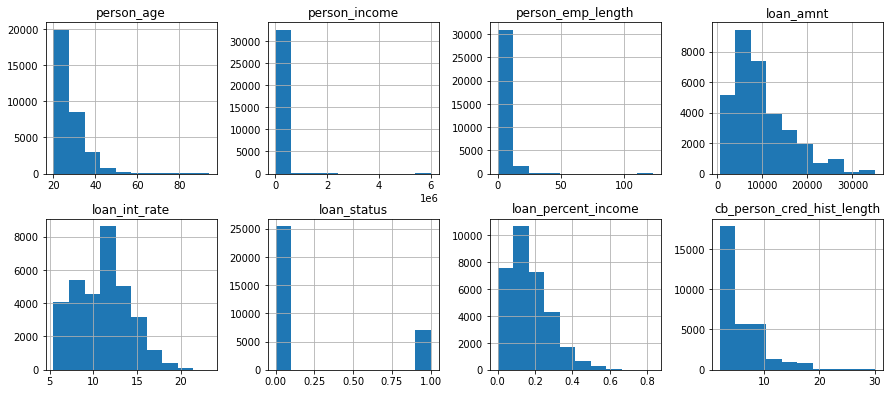

In [106]:
df_kredit.hist(layout=(3,4), figsize=(15,10))
plt.show()

Outliner gesichtet bei person_income, eine Anstellung von ueber 100 Jahren in person_emp_length ist wohl auch eher unwahrscheinlich ;)

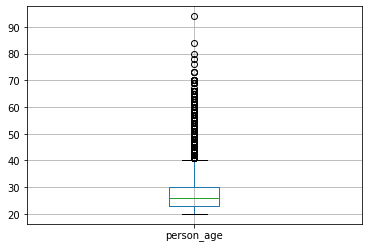

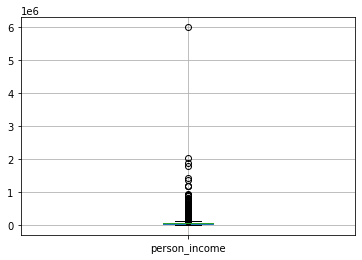

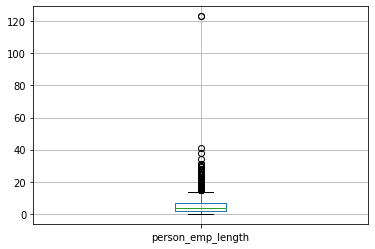

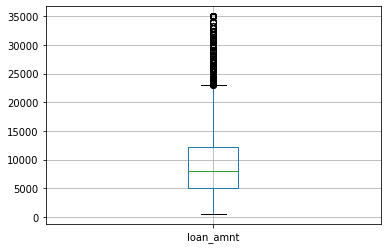

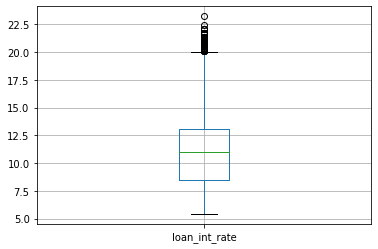

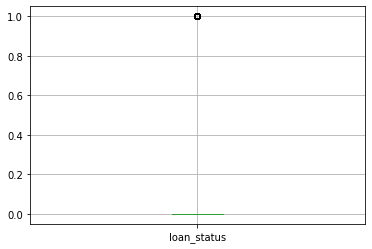

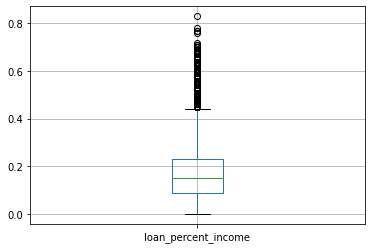

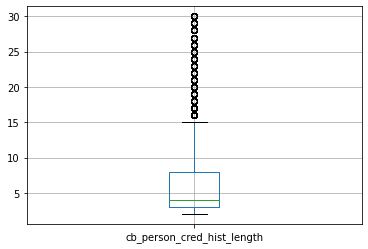

In [107]:
to_plot = [x for x in df_kredit.columns if df_kredit[x].dtype in (float, int, 'int64', 'float64')]

for col in to_plot:
    df_kredit.boxplot([col])
    plt.show()

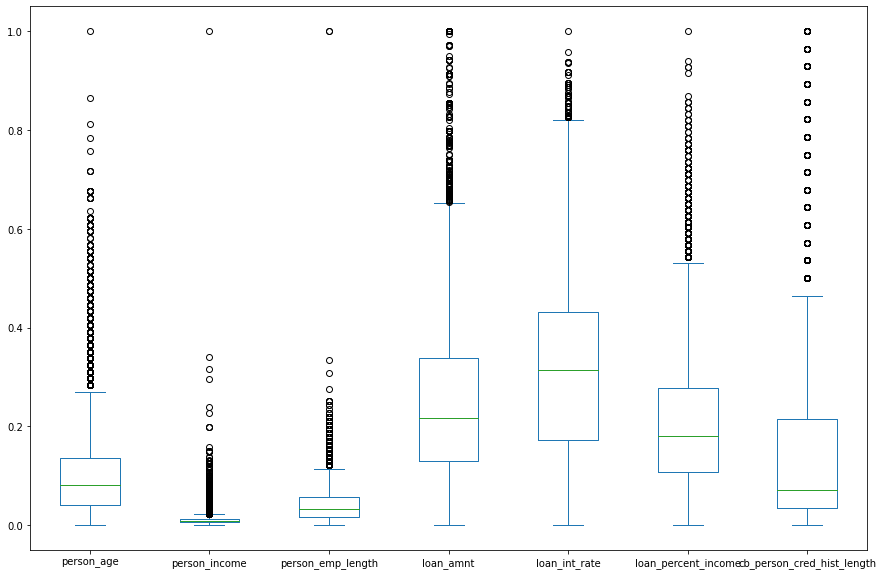

In [108]:
'''
for column in ('person_age', 'person_income', 'person_emp_length', 'loan_amnt',
               'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'):
    plt.figure()
    df_kredit.boxplot([column])
    
plt.show()
'''
n = df_kredit[to_plot]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = pd.DataFrame(sc.fit_transform(n.drop(['loan_status'], axis=1)), 
                      columns=n.drop(['loan_status'], axis=1).columns)
scaled.plot(kind='box', layout=(2,4), figsize=(15, 10))
plt.show()

#### Outliner entfernen

In [109]:
df_kredit.drop(df_kredit[df_kredit[df_kredit.person_age > 100].index])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56.0,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [110]:
df_kredit.drop(df_kredit[df_kredit.person_age > 70].index, inplace=True)

df_kredit.drop(df_kredit[df_kredit.person_income > \
               df_kredit.person_income.median() + \
               df_kredit.person_income.std() * 1.2].index, inplace=True)

df_kredit.drop(df_kredit[df_kredit.person_emp_length > \
               df_kredit.person_emp_length.median() + \
               df_kredit.person_emp_length.std() * 1.2].index, inplace=True)



df_kredit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21.0,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52.0,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


##### Datensatz erneut visuell ueberpruefen

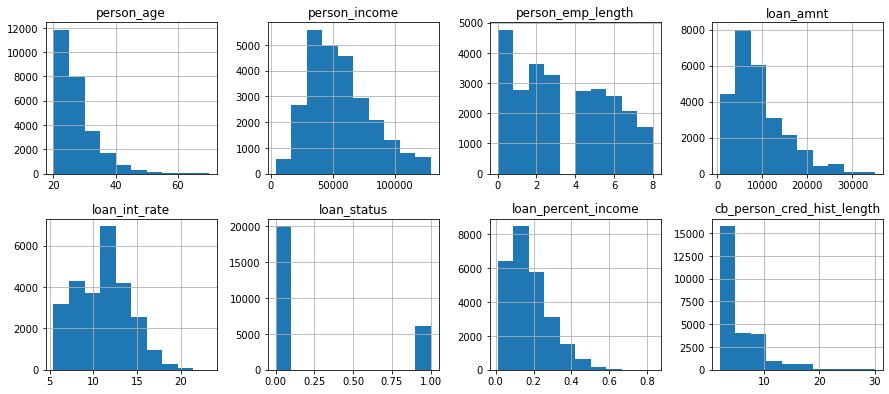

In [111]:
df_kredit.hist(layout=(3,4), figsize=(15,10))
plt.show()

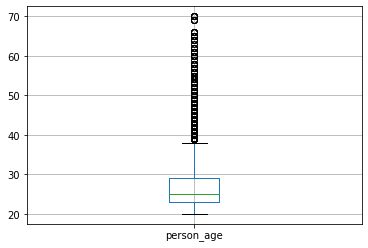

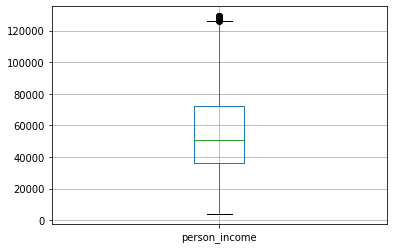

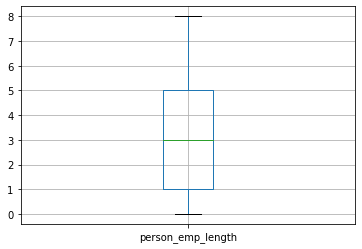

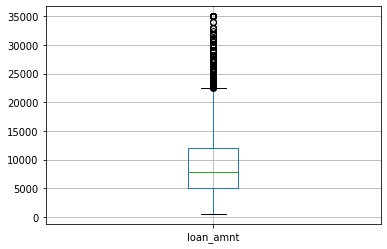

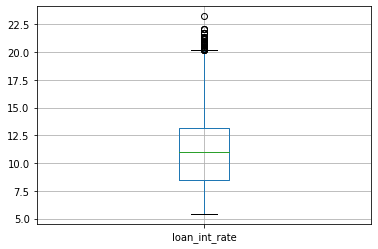

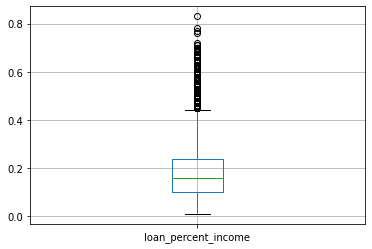

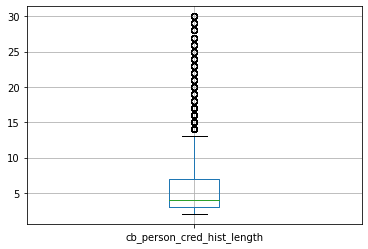

In [112]:
for column in ('person_age', 'person_income', 'person_emp_length', 'loan_amnt',
               'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'):
    plt.figure()
    df_kredit.boxplot([column])
    
plt.show()

In [113]:
home_ownership = pd.get_dummies(df_kredit.person_home_ownership, prefix='ownership')
loan_intent = pd.get_dummies(df_kredit.loan_intent, prefix='loan_intend')
loan_grade = pd.get_dummies(df_kredit.loan_grade, prefix='loan_grade')
default = pd.get_dummies(df_kredit.cb_person_default_on_file, drop_first=True, prefix='default')
df_kredit.drop(['person_home_ownership', 'loan_intent', 
                'loan_grade', 'cb_person_default_on_file'], axis=1, inplace=True)
df_kredit = pd.concat([df_kredit, home_ownership, loan_intent, loan_grade, default], axis=1)
df_kredit.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,ownership_MORTGAGE,ownership_OTHER,...,loan_intend_PERSONAL,loan_intend_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_Y
1,21.0,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,25.0,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,0,1,0,0,0,0,0
3,23.0,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,0,1,0,0,0,0,0
4,24.0,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,0,1,0,0,0,0,1
5,21.0,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0,1,1,0,0,0,0,0,0,0


#### Heatmap erzeugen

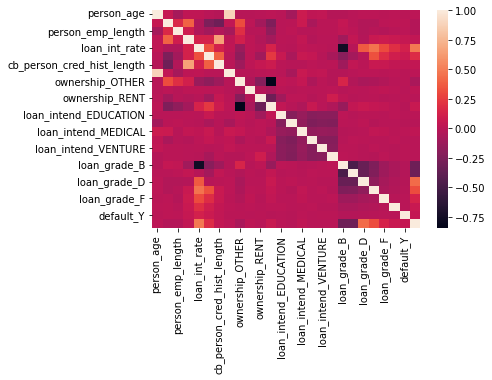

In [114]:
# Target an letzte Stelle verschieben
cols = df_kredit.columns.to_list()
del cols[cols.index('loan_status')]
cols += ['loan_status']
df_kredit.columns = cols

sns.heatmap(df_kredit.corr())
plt.show()

In [123]:
df_kredit.reset_index(inplace=True)

In [124]:
# features auswählen
df_kredit_features = df_kredit[['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']]
df_kredit_target = df_kredit.loan_status.to_frame()

In [125]:
# Achtung, wenn kein Range Objekt dann kein zusammenhängender Bereich
df_kredit_features.index.values
# df_kredit_target.index.values

array([    0,     1,     2, ..., 26158, 26159, 26160])

In [126]:
df_kredit_features.index.values == df_kredit_target.index.values

array([ True,  True,  True, ...,  True,  True,  True])

In [127]:
from sklearn.preprocessing import StandardScaler
df_kredit_features = pd.DataFrame(StandardScaler().fit_transform(df_kredit_features), 
                         columns=['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income'])


In [128]:
df_kredit_features

,person_income,loan_amnt,loan_int_rate,loan_percent_income
0,-1.810158,-1.368690,0.033433,-0.553549
1,-1.810158,-0.600437,0.600566,1.806523
2,0.385414,4.435886,1.374229,1.806523
3,-0.050558,4.435886,1.059519,1.806523
4,-1.798375,-1.112605,-1.277859,1.806523
...,...,...,...,...
26156,0.346138,-0.685798,0.072771,-0.553549
26157,-0.105545,-0.549220,0.695635,-0.553549
26158,2.525999,1.469577,-1.163121,-0.553549
26159,0.797820,4.435886,-0.015741,1.806523


In [132]:
df_kredit_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26161 entries, 0 to 26160
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   loan_status  26161 non-null  uint8
dtypes: uint8(1)
memory usage: 25.7 KB


In [134]:
df_kredit = pd.concat([df_kredit_features, df_kredit_target], axis=1)
df_kredit.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,-1.810158,-1.368690,0.033433,-0.553549,0
1,-1.810158,-0.600437,0.600566,1.806523,0
2,0.385414,4.435886,1.374229,1.806523,0
3,-0.050558,4.435886,1.059519,1.806523,1
4,-1.798375,-1.112605,-1.277859,1.806523,0


In [135]:
df_kredit.to_csv('credit_risk_clean.csv', index=False)